In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [107]:
df = pd.read_csv("losses.csv")

loss_mean = pd.read_csv("losses_mean.csv")

#df = loss.append(loss_mean)

In [74]:
loss_mean

,model,loss,Replacement,Submodels,Ensemble,Sessions,Trials,Voting
0,model_name,0.626156,True,4,average,32,50,mean
1,model_name,0.626156,True,4,average,32,50,mean
2,model_name,0.626156,True,4,average,32,50,mean
3,model_name,0.626156,True,4,average,32,50,mean
4,model_name,0.626156,True,4,average,32,50,mean
...,...,...,...,...,...,...,...,...
565,model_name,0.613512,True,32,average,256,200,mean
566,model_name,0.613512,True,32,average,256,200,mean
567,model_name,0.613512,True,32,average,256,200,mean
568,model_name,0.613512,True,32,average,256,200,mean


In [ ]:
df["Replacement"] = df["Replacement"].astype("string")
df["Replacement"] = df["Replacement"].str.lower()

In [110]:
dfff = df.query('Sessions == 32 and Trials == 50 ')

dfff.groupby(["Replacement", "Voting", "Submodels", "Trials", "Sessions"]).loss.mean()

#df["Replacement"][1]

Replacement  Voting  Submodels  Trials  Sessions
false        median  4          50      32          0.615014
                     16         50      32          0.872852
                     32         50      32          0.649938
true         median  4          50      32          0.593845
                     16         50      32          0.655046
                     32         50      32          0.593376
Name: loss, dtype: float64

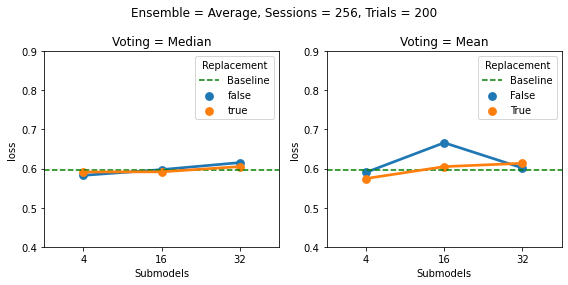

In [144]:
df1 = df.query('Sessions == 256 and Trials == 200 and Voting == "median" and Ensemble == "average" ')
baseline_acc = df.query('model == "Baseline"').loss.mean() 


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) #, sharex=True

  
ax[0].axhline(baseline_acc, ls='--', color="green", label="Baseline")

sns.pointplot(
        data=df1, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        errorbar="sd",
        ax=ax[0]
        )



ax[1].axhline(baseline_acc, ls='--', color="green", label="Baseline")

df2 = loss_mean.query('Sessions == 256 and Trials == 200 and Voting == "mean" and Ensemble == "average" ')
sns.pointplot(
        data=df2, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        errorbar="sd",
        ax=ax[1]
        )

ax[0].set_title("Voting = Median")
ax[1].set_title("Voting = Mean")


ax[1].set_ylim(0.4, 0.9)
ax[0].set_ylim(0.4, 0.9)

#ax[1].set_yticks(np.arange(0.4,1, 0.05))


plt.suptitle("Ensemble = Average, Sessions = 256, Trials = 200")

plt.tight_layout()
plt.show()


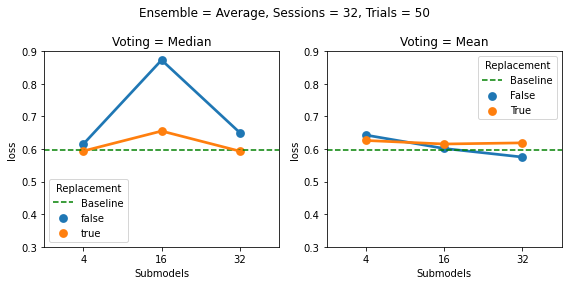

In [146]:
df1 = df.query('Sessions == 32 and Trials == 50 and Voting == "median" and Ensemble == "average" ')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

     
ax[0].axhline(baseline_acc, ls='--', color="green", label="Baseline")

sns.pointplot(
        data=df1, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax=ax[0]
        )

ax[0].set_title("Voting = Median")


ax[1].axhline(baseline_acc, ls='--', color="green", label="Baseline")

df2 = loss_mean.query('Sessions == 32 and Trials == 50 and Voting == "mean" and Ensemble == "average" ')
sns.pointplot(
        data=df2, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax=ax[1]
        )
        
ax[1].set_title("Voting = Mean")


ax[1].set_ylim(0.3, 0.9)
ax[0].set_ylim(0.3, 0.9)


plt.suptitle("Ensemble = Average, Sessions = 32, Trials = 50")

plt.tight_layout()
plt.show()

# facet by vote and average

### beta

In [149]:
baseline_acc2 = [0.6868224143981934,
 0.6868224740028381,
 0.6868224143981934,
 0.6868224740028381,
 0.6868224740028381,
 0.6868224740028381,
 0.6868223547935486,
 0.6868224740028381,
 0.6868224740028381,
 0.6868224143981934]

In [123]:
df_beta = pd.read_csv("losses_beta.csv")


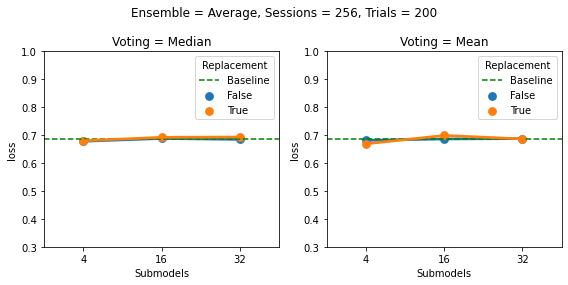

In [153]:
df1 = df_beta.query('Sessions == 256 and Trials == 200 and Voting == "median" and Ensemble == "average" ')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

     
ax[0].axhline( np.mean(baseline_acc2), ls='--', color="green", label="Baseline")

sns.pointplot(
        data=df1, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax=ax[0]
        )

ax[0].set_title("Voting = Median")


ax[1].axhline(np.mean(baseline_acc2), ls='--', color="green", label="Baseline")

df2 = df_beta.query('Sessions == 256 and Trials == 200 and Voting == "mean" and Ensemble == "average" ')
sns.pointplot(
        data=df2, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax=ax[1]
        )
        
ax[1].set_title("Voting = Mean")


ax[1].set_ylim(0.3,1)
ax[0].set_ylim(0.3,1)


plt.suptitle("Ensemble = Average, Sessions = 256, Trials = 200")

plt.tight_layout()
plt.show()

# facet by vote and average